In [1]:
using Plots
using DataFrames
using CSV
using LaTeXStrings
include("./TwoSpin_env.jl")

reward (generic function with 1 method)

In [17]:
#=
read_data = CSV.read("/home/yoshihiro/Documents/Data/TwoSpin_Konly_d2_optADAM_W10.0_xi0.2_Jx0.7_Jz1.0_hz0.5_batch3_eps0.1_eta1e-3_g0.95_0215/K_TL5000.csv", DataFrame)
Kt_data = Matrix(read_data)
read_data2 = CSV.read("/home/yoshihiro/Documents/Data/TwoSpin_Konly_d8_optADAM_W10.0_xi0.2_Jx0.7_Jz1.0_hz0.5_batch2_eps0.1_eta1e-3_g0.95_0215/K_TL5000.csv", DataFrame)
Kt_data2 = Matrix(read_data2)
=#
read_data = CSV.read("/home/yoshihiro/Documents/Data/TwoSpin_Konly_d2_optADAM_W20.0_xi0.2_Jx0.7_Jz1.0_hz0.5_batch4_eps0.1_eta1e-3_g0.95_0215/K_TL5000.csv", DataFrame)
Kt_data = Matrix(read_data)
read_data2 = CSV.read("/home/yoshihiro/Documents/Data/TwoSpin_Konly_d8_optADAM_W20.0_xi0.2_Jx0.7_Jz1.0_hz0.5_batch1_eps0.1_eta1e-3_g0.95_0215/K_TL3000.csv", DataFrame)
Kt_data2 = Matrix(read_data2)
println("read!")

read!


In [18]:
e = TS_env(init_env(100, 20.0, 0.2, 1.0, 0.7, 0.5)...)
println("finish!")

finish!


In [6]:
function FM_Kt2(en::TS_env)
    Kt0 = zeros(Float64, en.t_size, en.HS_size^2)
    for t in 1:en.t_size
        ktt = en.V_t * (cos(2pi*t/en.t_size)-1.0) / en.Ω + 1.0im * (en.V_t*en.H_0 - en.H_0*en.V_t)  * sin(2pi*t/en.t_size) / en.Ω^2 
        ktt = Hermitian(ktt)
        Kt0[t,:] = MtoV(ktt, en)
    end
    return Kt0
end

function FM_Kt3(en::TS_env)
    Kt0 = zeros(Float64, en.t_size, en.HS_size^2)
    for t in 1:en.t_size
        c1 = en.V_t*en.H_0 - en.H_0*en.V_t
        ktt = en.V_t * (cos(2pi*t/en.t_size)-1.0) / en.Ω + 1.0im * c1  * sin(2pi*t/en.t_size) / en.Ω^2 + (-en.H_0*c1+c1*en.H_0)* (cos(2pi*t/en.t_size)-1.0) / (en.Ω^3)
        ktt = Hermitian(ktt)
        Kt0[t,:] = MtoV(ktt, en)
    end
    return Kt0
end

FM_Kt3 (generic function with 1 method)

In [19]:
Kt_hand = FM_Kt2(e)
Kt_hand3 = FM_Kt3(e)
println("finish!")

finish!


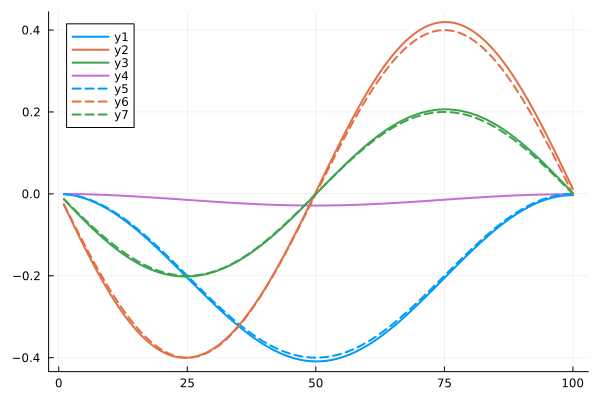

In [20]:
plot(e.Ω*(Kt_data[:,2]+Kt_data[:,4]+Kt_data[:,11]+Kt_data[:,14])/8, width=2.0)
plot!(e.Ω^2*(Kt_data[:,3]+Kt_data[:,5]-Kt_data[:,12]-Kt_data[:,15])/8, width=2.0)
plot!(e.Ω^2*(Kt_data[:,3]+Kt_data[:,5]+Kt_data[:,12]+Kt_data[:,15])/8, width=2.0)
plot!(e.Ω^2*(Kt_data[:,2]+Kt_data[:,4]-Kt_data[:,11]-Kt_data[:,14])/16, width=2.0)
plot!(-e.Ω*(Kt_hand[:,2]+Kt_hand[:,4]+Kt_hand[:,11]+Kt_hand[:,14])/4, style=:dash, color=1, width=2.0)
plot!(-e.Ω^2*(Kt_hand[:,3]+Kt_hand[:,5]-Kt_hand[:,12]-Kt_hand[:,15])/4, style=:dash, color=2, width=2.0)
plot!(-e.Ω^2*(Kt_hand[:,3]+Kt_hand[:,5]+Kt_hand[:,12]+Kt_hand[:,15])/4, style=:dash, color=3, width=2.0)

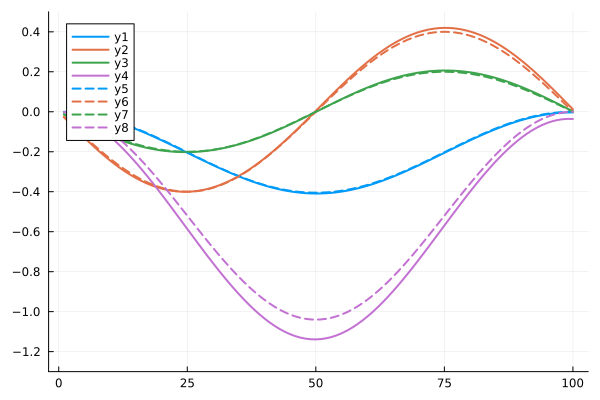

In [21]:
γ = 1.0
plot(γ*e.Ω*(Kt_data[:,2]+Kt_data[:,4]+Kt_data[:,11]+Kt_data[:,14])/8, width=2.0, yrange=(-1.3,0.5), yticks=([-1.2,-1.0,-0.8,-0.6,-0.4,-0.2,0.0,0.2,0.4]))
plot!(γ*e.Ω^2*(Kt_data[:,3]+Kt_data[:,5]-Kt_data[:,12]-Kt_data[:,15])/8, width=2.0)
plot!(γ*e.Ω^2*(Kt_data[:,3]+Kt_data[:,5]+Kt_data[:,12]+Kt_data[:,15])/8, width=2.0)
plot!(γ*e.Ω^3*(Kt_data[:,2]+Kt_data[:,4]-Kt_data[:,11]-Kt_data[:,14])/8, width=2.0)
plot!(-e.Ω*(Kt_hand3[:,2]+Kt_hand3[:,4]+Kt_hand3[:,11]+Kt_hand3[:,14])/4, style=:dash, color=1, width=2.0)
plot!(-e.Ω^2*(Kt_hand3[:,3]+Kt_hand3[:,5]-Kt_hand3[:,12]-Kt_hand3[:,15])/4, style=:dash, color=2, width=2.0)
plot!(-e.Ω^2*(Kt_hand3[:,3]+Kt_hand3[:,5]+Kt_hand3[:,12]+Kt_hand3[:,15])/4, style=:dash, color=3, width=2.0)
plot!(-e.Ω^3*(Kt_hand3[:,2]+Kt_hand3[:,4]-Kt_hand3[:,11]-Kt_hand3[:,14])/4, style=:dash, color=4, width=2.0)

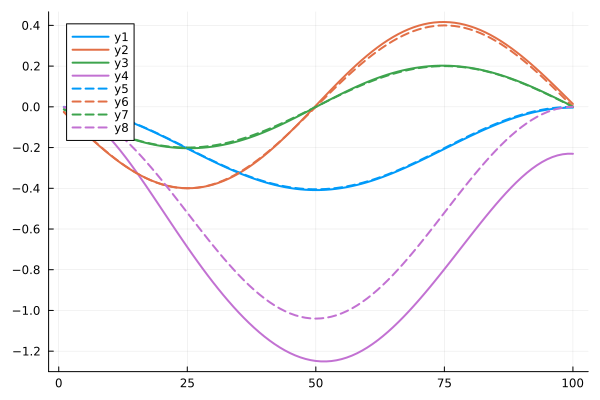

In [22]:
plot(γ*e.Ω*(Kt_data2[:,2]+Kt_data2[:,4]+Kt_data2[:,11]+Kt_data2[:,14])/8, width=2.0, yticks=([-1.2,-1.0,-0.8,-0.6,-0.4,-0.2,0.0,0.2,0.4]))
plot!(γ*e.Ω^2*(Kt_data2[:,3]+Kt_data2[:,5]-Kt_data2[:,12]-Kt_data2[:,15])/8, width=2.0)
plot!(γ*e.Ω^2*(Kt_data2[:,3]+Kt_data2[:,5]+Kt_data2[:,12]+Kt_data2[:,15])/8, width=2.0)
plot!(γ*e.Ω^3*(Kt_data2[:,2]+Kt_data2[:,4]-Kt_data2[:,11]-Kt_data2[:,14])/8, width=2.0)
plot!(-e.Ω*(Kt_hand3[:,2]+Kt_hand3[:,4]+Kt_hand3[:,11]+Kt_hand3[:,14])/4, style=:dash, color=1, width=2.0)
plot!(-e.Ω^2*(Kt_hand3[:,3]+Kt_hand3[:,5]-Kt_hand3[:,12]-Kt_hand3[:,15])/4, style=:dash, color=2, width=2.0)
plot!(-e.Ω^2*(Kt_hand3[:,3]+Kt_hand3[:,5]+Kt_hand3[:,12]+Kt_hand3[:,15])/4, style=:dash, color=3, width=2.0)
plot!(-e.Ω^3*(Kt_hand3[:,2]+Kt_hand3[:,4]-Kt_hand3[:,11]-Kt_hand3[:,14])/4, style=:dash, color=4, width=2.0)

In [27]:
function check_HF(en::TS_env, Kt::Matrix{Float64})
    Nt = size(Kt)[1]
    HF = zeros(Float64, Nt, en.HS_size^2)
    
    dt = (2pi/Nt/en.Ω)
    #Ud_p = zeros(Float64, en.t_size, en.HS_size^2)
    for t in 1:Nt
        if(t>1)
            tt = t-1
        else
            tt = Nt
        end
        KtM = VtoM(Kt[t,:],en)
        KttM = VtoM(Kt[tt,:],en)
        Ud = exp(-1.0im*KtM)
        U = Ud'
        Ud_p = (Ud-exp(-1.0im*KttM))/dt
        HfM = U*(en.H_0 + sin(2pi*t/Nt)*en.V_t)*Ud -1.0im*U*Ud_p
        HF[t,:] = MtoV(Hermitian(HfM), en)
    end
    return HF #, Ud_p
end
function check_HF_D(en::TS_env, Kt::Matrix{Float64})
    Nt = size(Kt)[1]
    HF = zeros(Float64, Nt, en.HS_size^2)
    
    dt = (2pi/Nt/en.Ω)
    #Ud_p = zeros(Float64, en.t_size, en.HS_size^2)
    for t in 1:Nt
        if(t>1)
            tt = t-1
            KtM = VtoM(Kt[t,:],en)
            KttM = VtoM(Kt[tt,:],en)
            Ud = exp(-1.0im*KtM)
            U = Ud'
            Ud_p = (Ud-exp(-1.0im*KttM))/dt
            HfM = U*(en.H_0 + sin(2pi*t/Nt)*en.V_t)*Ud -1.0im*U*Ud_p
            HF[t,:] = MtoV(Hermitian(HfM), en)
        else
            KtM = VtoM(Kt[t,:],en)
            KttM = zeros(Float64, en.HS_size, en.HS_size)
            Ud = exp(-1.0im*KtM)
            U = Ud'
            Ud_p = (Ud-exp(-1.0im*KttM))/dt
            HfM = U*(en.H_0 + sin(2pi*t/Nt)*en.V_t)*Ud -1.0im*U*Ud_p
            HF[t,:] = MtoV(Hermitian(HfM), en)
        end
    end
    return HF #, Ud_p
end
function check_HF2(en::TS_env, Kt::Matrix{Float64})
    Nt = size(Kt)[1]
    HF = zeros(Float64, Nt, en.HS_size^2)
    
    dt = (2pi/Nt/en.Ω)
    #Ud_p = zeros(Float64, en.t_size, en.HS_size^2)
    for t in 1:Nt
        tp = t+1
        tm = t-1
        if(t==1)
            tm = Nt
        elseif(t==Nt)
            tp = 1
        end
        KtM = VtoM(Kt[t,:],en)
        KtpM = VtoM(Kt[tp,:],en)
        KtmM = VtoM(Kt[tm,:],en)
        Ud = exp(-1.0im*KtM)
        U = Ud'
        Ud_p = (exp(-1.0im*KtpM)-exp(-1.0im*KtmM))/(2dt)
        HfM = U*(en.H_0 + sin(2pi*t/Nt)*en.V_t)*Ud -1.0im*U*Ud_p
        HF[t,:] = MtoV(Hermitian(HfM), en)
    end
    return HF
end

function check_HF2_D(en::TS_env, Kt::Matrix{Float64})
    Nt = size(Kt)[1]
    HF = zeros(Float64, Nt, en.HS_size^2)
    
    dt = (2pi/Nt/en.Ω)
    #Ud_p = zeros(Float64, en.t_size, en.HS_size^2)
    for t in 1:Nt
        tp = t+1
        tm = t-1
        if(t==1)
            KtM = VtoM(Kt[t,:],en)
            KtpM = VtoM(Kt[tp,:],en)
            KtmM = zeros(Float64, en.HS_size, en.HS_size)
            Ud = exp(-1.0im*KtM)
            U = Ud'
            Ud_p = (exp(-1.0im*KtpM)-exp(-1.0im*KtmM))/(2dt)
            HfM = U*(en.H_0 + sin(2pi*t/Nt)*en.V_t)*Ud -1.0im*U*Ud_p
            HF[t,:] = MtoV(Hermitian(HfM), en)
        elseif(t==Nt)
            KtM = VtoM(Kt[t,:],en)
            KtmM = VtoM(Kt[tm,:],en)
            Ud = exp(-1.0im*KtM)
            U = Ud'
            Ud_p = (Ud-exp(-1.0im*KtmM))/(dt)
            HfM = U*(en.H_0 + sin(2pi*t/Nt)*en.V_t)*Ud -1.0im*U*Ud_p
            HF[t,:] = MtoV(Hermitian(HfM), en)
        else
            KtM = VtoM(Kt[t,:],en)
            KtpM = VtoM(Kt[tp,:],en)
            KtmM = VtoM(Kt[tm,:],en)
            Ud = exp(-1.0im*KtM)
            U = Ud'
            Ud_p = (exp(-1.0im*KtpM)-exp(-1.0im*KtmM))/(2dt)
            HfM = U*(en.H_0 + sin(2pi*t/Nt)*en.V_t)*Ud -1.0im*U*Ud_p
            HF[t,:] = MtoV(Hermitian(HfM), en)
        end
    end
    return HF
end

check_HF2_D (generic function with 1 method)

In [24]:
HF_data = check_HF2_D(e, Kt_data)
HF_hand = check_HF2(e, -2.0Kt_hand)
HF_hand3 = check_HF2(e, -2.0Kt_hand3)

100×16 Matrix{Float64}:
 -2.0      -0.00639625  0.0300404  -0.00639625  …  -0.0100135    1.58259e-6
 -1.99998  -0.00636679  0.0301023  -0.00636679     -0.010034     5.52139e-6
 -1.99996  -0.0063122   0.0301656  -0.0063122      -0.0100551    1.17735e-5
 -1.99994  -0.00623269  0.0302302  -0.00623269     -0.0100764    2.0269e-5
 -1.99991  -0.00612857  0.0302957  -0.00612857     -0.0100981    3.09121e-5
 -1.99987  -0.00600025  0.030362   -0.00600025  …  -0.01012      4.35824e-5
 -1.99982  -0.00584824  0.0304286  -0.00584824     -0.0101419    5.81366e-5
 -1.99978  -0.00567313  0.0304954  -0.00567313     -0.0101638    7.44107e-5
 -1.99972  -0.00547562  0.030562   -0.00547562     -0.0101857    9.2222e-5
 -1.99966  -0.00525649  0.0306282  -0.00525649     -0.0102073    0.000111372
 -1.9996   -0.00501659  0.0306937  -0.00501659  …  -0.0102286    0.000131649
 -1.99954  -0.00475688  0.0307583  -0.00475688     -0.0102495    0.000152831
 -1.99947  -0.00447839  0.0308216  -0.00447839     -0.0102699  

In [96]:
function FM_Kt2_L(en::TS_env, Nt::Int)
    Kt0 = zeros(Float64, Nt, en.HS_size^2)
    for t in 1:Nt
        ktt = en.V_t * (cos(2pi*t/Nt)-1.0) / en.Ω + 1.0im * (en.V_t*en.H_0 - en.H_0*en.V_t)  * sin(2pi*t/Nt) / en.Ω^2 
        ktt = Hermitian(ktt)
        Kt0[t,:] = MtoV(ktt, en)
    end
    return Kt0
end

function FM_Kt3_L(en::TS_env, Nt::Int)
    Kt0 = zeros(Float64, Nt, en.HS_size^2)
    for t in 1:Nt
        c1 = en.V_t*en.H_0 - en.H_0*en.V_t
        ktt = en.V_t * (cos(2pi*t/Nt)-1.0) / en.Ω + 1.0im * c1  * sin(2pi*t/Nt) / en.Ω^2 + (-en.H_0*c1+c1*en.H_0)* (cos(2pi*t/Nt)-1.0) / (en.Ω^3)
        ktt = Hermitian(ktt)
        Kt0[t,:] = MtoV(ktt, en)
    end
    return Kt0
end

FM_Kt3_L (generic function with 1 method)

In [120]:
Kt_hand = FM_Kt2_L(e,1000)
Kt_hand3 = FM_Kt3_L(e, 1000)

println("OK")

OK


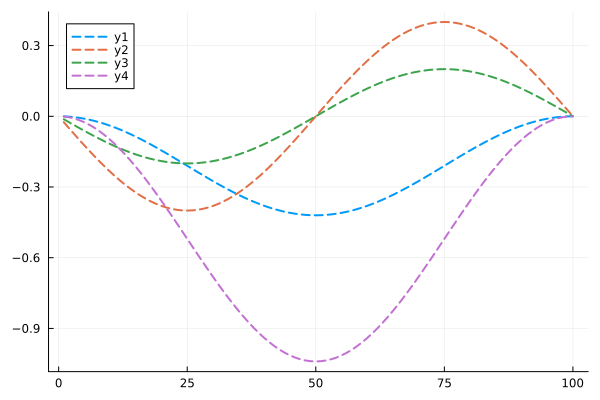

In [110]:
plot(-e.Ω*(Kt_hand3[:,2]+Kt_hand3[:,4]+Kt_hand3[:,11]+Kt_hand3[:,14])/4, style=:dash, color=1, width=2.0)
plot!(-e.Ω^2*(Kt_hand3[:,3]+Kt_hand3[:,5]-Kt_hand3[:,12]-Kt_hand3[:,15])/4, style=:dash, color=2, width=2.0)
plot!(-e.Ω^2*(Kt_hand3[:,3]+Kt_hand3[:,5]+Kt_hand3[:,12]+Kt_hand3[:,15])/4, style=:dash, color=3, width=2.0)
plot!(-e.Ω^3*(Kt_hand3[:,2]+Kt_hand3[:,4]-Kt_hand3[:,11]-Kt_hand3[:,14])/4, style=:dash, color=4, width=2.0)

In [39]:
HF_hand= check_HF2(e, -2Kt_hand)
HF_hand3 = check_HF2(e, -2Kt_hand3)
HF_data = check_HF_D(e, Kt_data)
HF_data2 = check_HF2_D(e, Kt_data)
println("OK")

OK


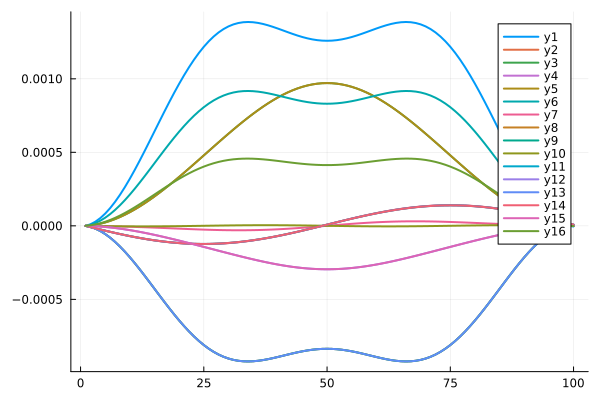

In [29]:
#p3=plot((HF_hand3[:,1]), width=2.0)
p3=plot((HF_hand3[:,1].-HF_hand3[1,1]), width=2.0)
for i in 2:e.HS_size^2
    p3=plot!((HF_hand3[:,i].-HF_hand3[1,i]), width=2.0)
    #p3=plot!((HF_hand3[:,i]), width=2.0)
end
p3

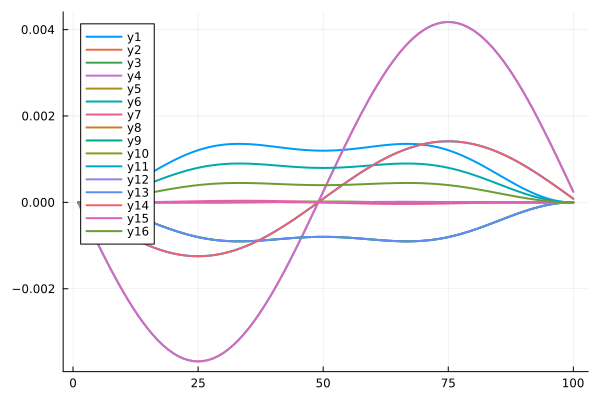

In [30]:
p=plot((HF_hand[:,1].-HF_hand[1,1]), width=2.0)
for i in 2:e.HS_size^2
    p=plot!((HF_hand[:,i].-HF_hand[1,i]), width=2.0)
end
p

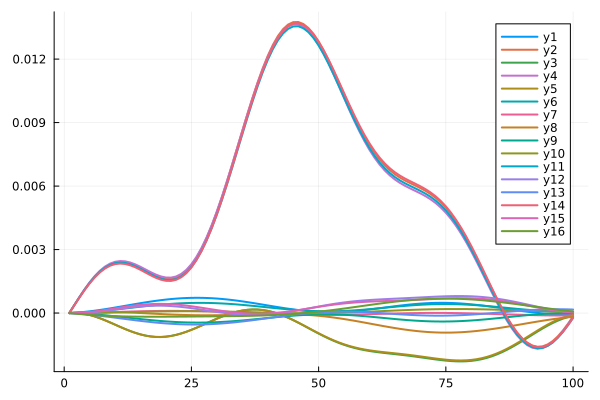

In [31]:
pd=plot((HF_data[:,1].-HF_data[1,1]), width=2.0)
for i in 2:e.HS_size^2
    pd=plot!((HF_data[:,i].-HF_data[1,i]), width=2.0)
end
pd

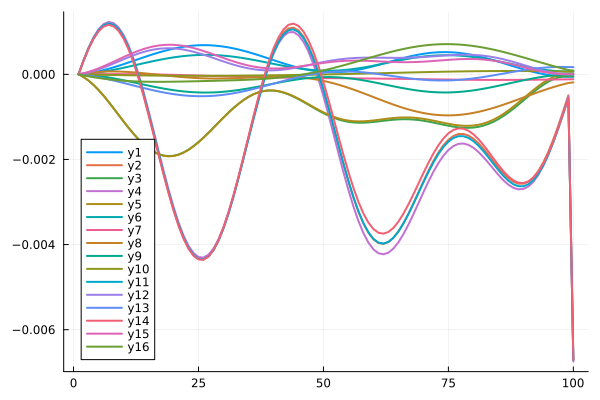

In [32]:
pd2=plot((HF_data2[:,1].-HF_data2[1,1]), width=2.0)
for i in 2:e.HS_size^2
    pd2=plot!((HF_data2[:,i].-HF_data2[1,i]), width=2.0)
end
pd2

In [34]:
function EofHF(en::TS_env, HF::Matrix{Float64})
    nt = size(HF)[1]
    EV = zeros(Float64, nt, en.HS_size)
    for t in 1:nt
        HF_M = VtoM(HF[t,:], en)
        EV[t,:], v = eigen(HF_M)
    end
    return EV
end

EofHF (generic function with 1 method)

In [35]:
E_hand = EofHF(e, HF_hand)
E_hand3 = EofHF(e, HF_hand3)

100×4 Matrix{Float64}:
 -2.05966  0.0594621  0.650196  1.35
 -2.05965  0.0594646  0.650186  1.35
 -2.05963  0.0594689  0.650168  1.34999
 -2.0596   0.0594748  0.650144  1.34998
 -2.05957  0.0594822  0.650113  1.34997
 -2.05953  0.0594911  0.650076  1.34996
 -2.05948  0.0595014  0.650033  1.34994
 -2.05943  0.0595129  0.649986  1.34993
 -2.05937  0.0595256  0.649933  1.34991
 -2.05931  0.0595393  0.649877  1.34989
 -2.05924  0.0595537  0.649817  1.34987
 -2.05917  0.0595689  0.649754  1.34985
 -2.0591   0.0595845  0.64969   1.34983
  ⋮                             
 -2.05924  0.0595537  0.649817  1.34987
 -2.05931  0.0595393  0.649877  1.34989
 -2.05937  0.0595256  0.649933  1.34991
 -2.05943  0.0595129  0.649986  1.34993
 -2.05948  0.0595014  0.650033  1.34994
 -2.05953  0.0594911  0.650076  1.34996
 -2.05957  0.0594822  0.650113  1.34997
 -2.0596   0.0594748  0.650144  1.34998
 -2.05963  0.0594689  0.650168  1.34999
 -2.05965  0.0594646  0.650186  1.35
 -2.05966  0.0594621  0.650196  1

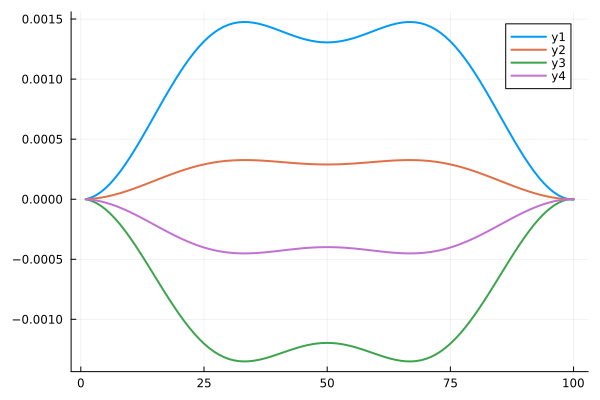

In [40]:
plot((E_hand[:,1].-E_hand[1,1]), width=2.0)
plot!((E_hand[:,2].-E_hand[1,2]), width=2.0)
plot!((E_hand[:,3].-E_hand[1,3]), width=2.0)
plot!((E_hand[:,4].-E_hand[1,4]), width=2.0)

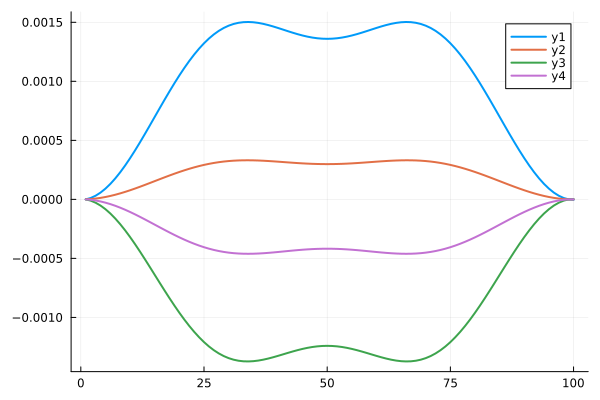

In [41]:
plot((E_hand3[:,1].-E_hand3[1,1]), width=2.0)
plot!((E_hand3[:,2].-E_hand3[1,2]), width=2.0)
plot!((E_hand3[:,3].-E_hand3[1,3]), width=2.0)
plot!((E_hand3[:,4].-E_hand3[1,4]), width=2.0)

In [135]:
test = rand(Float64, e.HS_size^2)
test_M = VtoM(test, e)

4×4 Hermitian{ComplexF64, Matrix{ComplexF64}}:
  0.60623+0.0im       0.229722-0.108963im  …  0.408584-0.437666im
 0.229722+0.108963im  0.254884+0.0im          0.281908-0.489891im
 0.466289+0.109455im  0.438812+0.465848im     0.353169-0.299896im
 0.408584+0.437666im  0.281908+0.489891im     0.571508+0.0im

In [141]:
@time s1 = tr(test_M^2)

  0.000016 seconds (4 allocations: 720 bytes)


4.0826527099434715

In [142]:
@time e1, v1 = eigen(test_M)
s2 = e1' * e1

  0.000043 seconds (15 allocations: 4.812 KiB)


4.082652709943458

In [1]:
testM = [1.0 -10.0; 5.0 2.0]
findmax(testM)[1]-findmin(testM)[1]

15.0